# Experiência 1: Filtragem de um sinal ruidoso

Jean Carlos Mello Xavier Faria - 11259628

Oliver


Primeiramente, vamos importar as bibliotecas que serão utilizadas durante a experiência.

In [23]:
using Plots
using WAV
using DSP
using Statistics
using Printf

$\textbf{a)}$ O sinal solicitado foi gerado com frequência de amostragem igual a 40kHz por 2 segundos.

O sinal discreto pode ser visualizado na imagem a seguir.



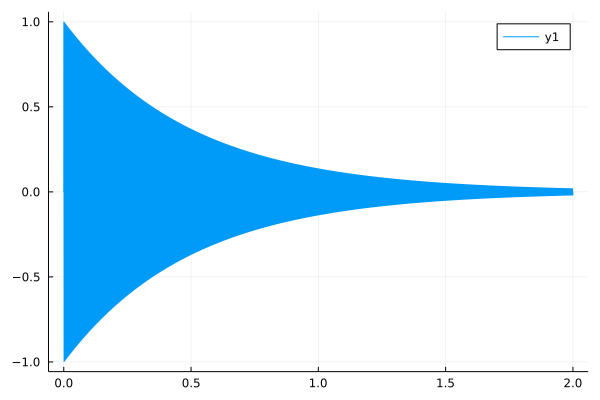

In [2]:
Ω = 2π*500
τ = 0.5
t=0:1/40000:2

x0 = sin.(Ω * t).^3 .* (exp.(-t./τ))
plot(t, x0)

O comprimento do sinal pode ser visto com a função size().

In [3]:
size(x0)

(80001,)

Portanto, o comprimento do sinal vale 80001.

Além disso, é possível escutar o sinal com a função wavplay().

In [4]:
wavplay(x0, 40000)

$\textbf{b)}$ Obtemos o ruido a partir da função "randn()", dessa forma conseguimos um sinal aleatório com distribuição gaussiana

In [5]:
vx = randn(length(x0), 1);

Para obter o ruído desejado, fazendo com que o sinal $x_0[n]$ tenha $SNR=10dB$. Será necessário calcular a potência do sinal, dada pela equação: $P=\frac{1}{N} \sum\limits_{n=0}^{N-1}x_{0}^{2}[n]$, isto é, a média dos valores de $x_0[n]$ ao quadrado.

In [6]:
# Cálculo da potência
x02 = x0.^2

P_x0 = mean(x02)

0.03904888633891437

Utilizando a fórmula do $SNR=\frac{P_{sinal}}{P_{ruido}}=\left( \frac{A_{sinal}}{A_{ruido}} \right)^2$, portanto, $A_{ruído}=\sqrt{\frac{P_{sinal}}{SNR}}$, como é desejado SNR em db, fazendo a conversão da escala linear para db, a equação fica: $A_{ruído}=\sigma_{v}=\sqrt{P_{sinal}\cdot10^{\frac{-SNR}{10}}}$, por fim esse valor é multiplicado no ruído, sendo também a sua variância.

In [7]:
SNR = 10
σv = sqrt(P_x0*10^(-SNR/10))
vx = σv.*vx;

Realizando a plotagem do gráfico com ruído e sem ruído.

In [8]:
x = x0 + vx

plot(t, x, label = "x[n] + v[n]")
plot!(t, x0, label = "x[n]")

Escutando o sinal com ruído.

In [9]:
wavplay(x, 40000)

$\textbf{c)}$ Para criarmos o filtro, criamos um sinal no formato "sinc" conforme solicitado e utilizamos a função "PolinomialRatio()"

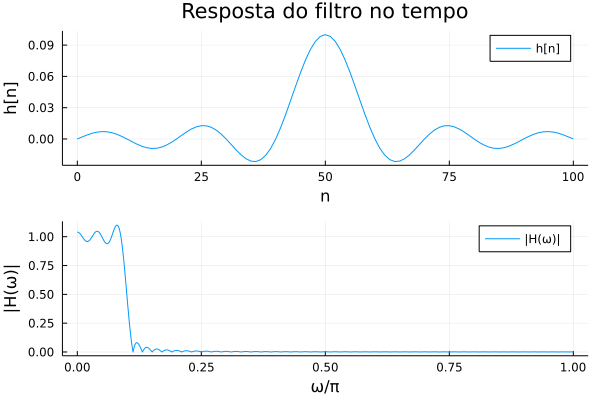

In [10]:
n = 0:100
hn = 0.1*sinc.(0.1*(n.-50))

p1 = plot(n, hn, xlabel="n", ylabel="h[n]", title="Resposta do filtro no tempo", label="h[n]") #No tempo
hnf = PolynomialRatio(hn, [1])

ω=range(0,π, length=80001)

H = freqz(hnf, ω)
p2 = plot(ω/π, abs.(H), xlabel="ω/π", ylabel = "|H(ω)|", label="|H(ω)|")
plot(p1, p2, layout = (2, 1))

$\textbf{d)}$ Utilizando a função "filt()" obtemos os sinais $x_0[n]$ e $x[n]$ filtrados

In [11]:
yn = filt(hn, [1], x)
y0n = filt(hn, [1], x0)

plot(t, yn, label="y[n]")
plot!(t, y0n, label="y0[n]")

In [12]:
wavplay(yn, 40000)

In [13]:
wavplay(y0n, 40000)

$e)$ Para um processo ser dito estacionário, ele não deve variar no tempo. Como $x[n]$ e $y[n]$ tem um componente deterministica $x_0[n]$ que varia para diferentes realizações, eles são não estacionários. 

Já $v_{x}[n]=x[n]-x_{0}[n]$ será o próprio ruído branco gaussiano, sendo assim, ele é IID e consequentemente WSS, já $v_{y}[n]$ é uma filtragem SLIT de um processo WSS, sendo ambos processos estacionários.

$\textbf{f)}$ A potência do ruído branco gaussiano, é dada pela sua variância ao quadrado $(\sigma_{v}^2)$. Já na saída, como há um filtro, será dado por $\sigma_{v}^2\cdot\sum\limits_{n=-\infty}^{\infty} h[n]$. 

Já para o cálculo teórico da densidade espectral de potência na entrada, é dada por  $S_x(\omega) = \cdot\sum\limits_{l=-\infty}^{\infty} \sigma_{v} e^{-j\omega l}$

In [14]:
Ps = sum(hn.^2)*σv^2
Pe = σv^2
print(Pe)
print("\n")
print(Ps)

0.0039048886338914368
0.00038259176085767493

$\textbf{g})$

In [35]:
L = [1000, 10000, 100000]
for i=1:3
    vx_ = zeros(L[i])
    for j=1:L[i]
        vx = σv.*randn(L[i])
        vx .= vx.^2
        vx_[j] = mean(vx)
    end 
    @printf("Potência média da entrada para L = %d = %.19f \n",L[i], mean(vx_))
end

Potência média da entrada para L = 1000 = 0.0038966143879156411 
Potência média da entrada para L = 10000 = 0.0039054292264630889 
Potência média da entrada para L = 100000 = 0.0039048829221970836 


In [62]:
L = [1000, 10000, 100000]
for i=1:length(L)
    vy_ = zeros(L[i])
    for j=1:L[i]
        vx = σv.*randn(L[i])
        vy = filt(hn, [1], vx)
        vy .= vy.^2
        vy_[j] = mean(vy)
    end 
    @printf("Potência média da entrada para L = %d = %.19f \n",L[i], mean(vy_))
end

Potência média da entrada para L = 1000 = 0.0003639005168472368 
Potência média da entrada para L = 10000 = 0.0003807733415800268 
Potência média da entrada para L = 100000 = 0.0003824123566555597 


 Temos que a densidade espectral de potência do ruído de entrada é: $S_X(\omega) = \sigma^2$, já que estamos tratando de um ruído branco.